In [12]:
import errors
import wolff
import metropolis
import evolution
import observables
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize.minpack import curve_fit

In [2]:
import sys
sys.setrecursionlimit(10000000)

In [3]:
frames, mag = evolution.evolution(metropolis.metropolis_evolution,1000,50,0.1,0.01)

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/observables.py:4: RuntimeWarning: invalid value encountered in double_scalars
  anal_M = np.nan_to_num(pow(1-pow(np.sinh(2*(1/(Temperature))*J),-4),1/8))


/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


<ErrorbarContainer object of 3 artists>

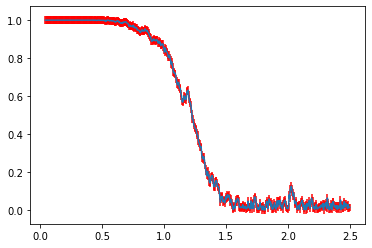

In [4]:
plt.errorbar(mag[0],mag[1],yerr=errors.get_error_observable(mag[1]),ecolor='r')

In [5]:
mag = np.array(mag)
N = len(mag[0])//4
af_mag = errors.get_autocorrelation_function(mag[1])

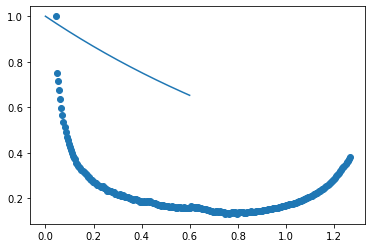

In [8]:
x = np.arange(0.6,step=0.001)
y = func(x, 1.40353129)
plt.scatter(mag[0][:len(af_mag)],af_mag)
plt.plot(x,y)

In [9]:
n = 10
x = np.arange(2,step=0.01)
arrays = []
taus = np.arange(0,1,step=0.1)
for tau in taus:
    arrays.append(func(x,tau))
arrays = np.array(arrays)

<ipython-input-7-573095ae2af6>:21: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-x/b)
<ipython-input-7-573095ae2af6>:21: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-x/b)


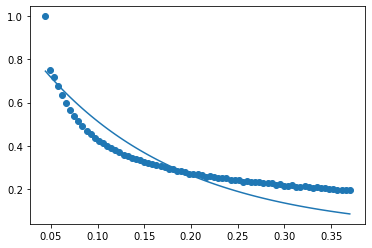

In [10]:
#plt.plot(x,np.transpose(arrays))
Y = af_mag[:75]
X = mag[0][:75]
plt.scatter(X,Y)
plt.plot(X,func(X,0.15))

In [11]:
curve_fit(func,X,Y)

NameError: name 'curve_fit' is not defined

In [ ]:
mag[1]

In [127]:
n = 200
curve_fit(func,mag[0],mag[1])

(array([1.40353129]), array([[0.00237787]]))

In [7]:
def func(x,b):
    """
    Function used to fit the decaying exponential of the autocorrelation func

    Parameters:
    -----------
    x: float

    a: float
        magnitude
    b: float
        characteristic distance
    c: float
        shift from zero

    Return:
    --------
    _: float
        function of exponential decay evaluated at x,a,b,c.
    """
    return np.exp(-x/b)